<a href="https://colab.research.google.com/github/baharehbehrouz/DL/blob/class/3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Download the required dataset file and script
!wget https://raw.githubusercontent.com/Alireza-Akhavan/SRU-deeplearning-workshop/master/dataset.py
!mkdir dataset
!wget https://github.com/Alireza-Akhavan/SRU-deeplearning-workshop/raw/master/dataset/Data_hoda_full.mat -P dataset



--2024-11-28 12:21:43--  https://raw.githubusercontent.com/Alireza-Akhavan/SRU-deeplearning-workshop/master/dataset.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 917 [text/plain]
Saving to: ‘dataset.py’

dataset.py          100%[===================>]     917  --.-KB/s    in 0s      

2024-11-28 12:21:43 (53.5 MB/s) - ‘dataset.py’ saved [917/917]

--2024-11-28 12:21:43--  https://github.com/Alireza-Akhavan/SRU-deeplearning-workshop/raw/master/dataset/Data_hoda_full.mat
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/Alireza-Akhavan/deeplearning-tensorflow2-notebooks/raw/master/dataset/Data_hoda

In [ ]:

# 1. Import libraries and modules
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
import numpy as np
from dataset import load_hoda
import matplotlib.pyplot as plt

# Load pre-shuffled HODA data into train and test sets
X_train, y_train, X_test, y_test = load_hoda(
    training_sample_size=3500,
    test_sample_size=400,
    size=28
)


In [ ]:


# Preprocess input data
# Standardize the data values to the range [-1, 1]
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = (X_train - 127.5) / 127.5
X_test = (X_test - 127.5) / 127.5

# Reshape to the original image shape (n x 784) -> (n x 28 x 28 x 1)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)


In [ ]:



# 2. Define model architecture
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:



# 3. Compile the model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['sparse_categorical_accuracy']
)


In [ ]:



# 4. Define the Learning Rate Scheduler
from tensorflow.keras.callbacks import LearningRateScheduler

# Function to schedule learning rate
def lr_schedule(epoch, lr):
    if epoch < 10:
        return 0.01  # High learning rate for initial epochs
    elif 10 <= epoch < 50:
        return 0.001  # Moderate learning rate
    else:
        return 0.0001  # Low learning rate for fine-tuning

# Initialize the LearningRateScheduler callback
lr_callback = LearningRateScheduler(lr_schedule)



In [ ]:


# 5. Train the model with the Learning Rate Scheduler
history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=256,
    validation_split=0.2,
    callbacks=[lr_callback]
)


Epoch 1/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 19s 511ms/step - loss: 1.6535 - sparse_categorical_accuracy: 0.5401 - val_loss: 2.3275 - val_sparse_categorical_accuracy: 0.5029 - learning_rate: 0.0100
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3291 - sparse_categorical_accuracy: 0.8931 - val_loss: 1.5447 - val_sparse_categorical_accuracy: 0.6029 - learning_rate: 0.0100
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1975 - sparse_categorical_accuracy: 0.9380 - val_loss: 0.5678 - val_sparse_categorical_accuracy: 0.8214 - learning_rate: 0.0100
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1242 - sparse_categorical_accuracy: 0.9604 - val_loss: 0.2114 - val_sparse_categorical_accuracy: 0.9543 - learning_rate: 0.0100
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0871 - sparse_categorical_accuracy: 0.9722 - val_loss: 0.5118 - val_sparse_categorical_accuracy: 0.8429 - learning_rate: 0.0100
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 

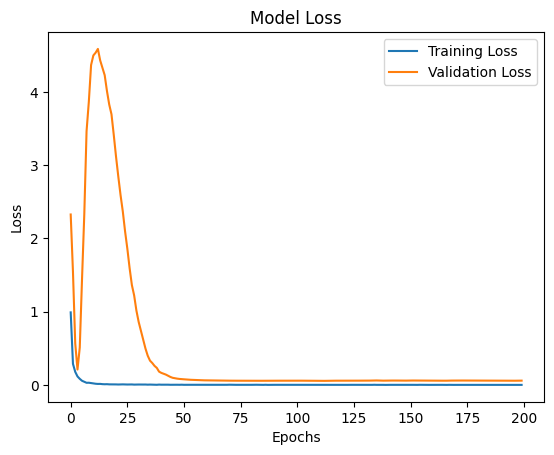

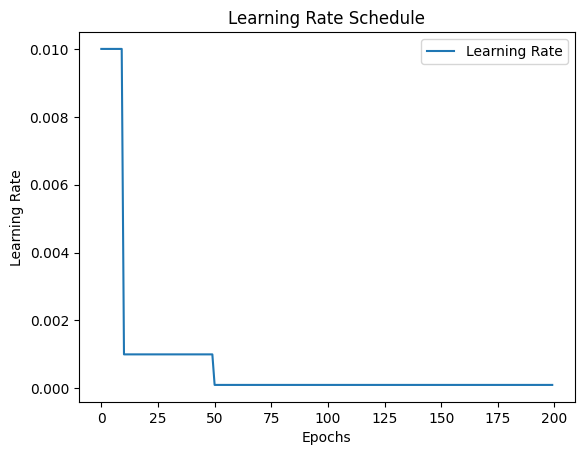

In [ ]:




# Analyze the learning rate schedule and validation performance
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot learning rate
lrs = [lr_schedule(epoch, 0.01) for epoch in range(200)]
plt.plot(lrs, label='Learning Rate')
plt.title('Learning Rate Schedule')
plt.xlabel('Epochs')
plt.ylabel('Learning Rate')
plt.legend()
plt.show()







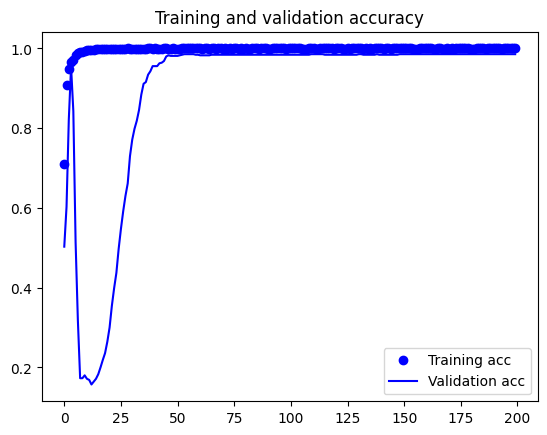

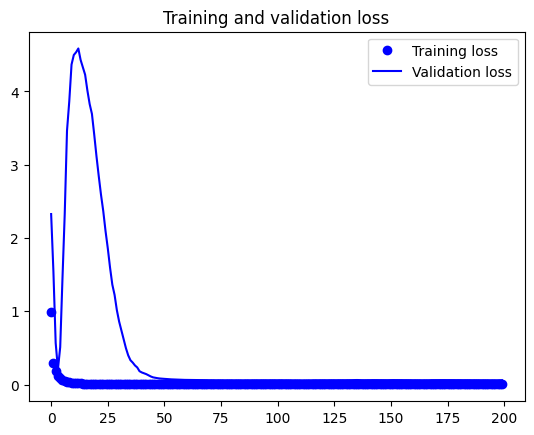

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()